In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

In [3]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only first two features for 2D visualization
y = iris.target
target_names = iris.target_names

In [4]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)



K=1
Accuracy: 0.7111111111111111


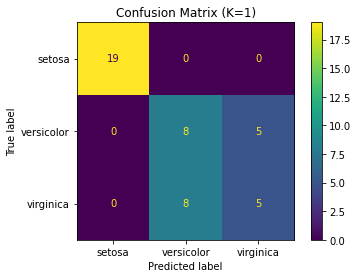


K=3
Accuracy: 0.8444444444444444


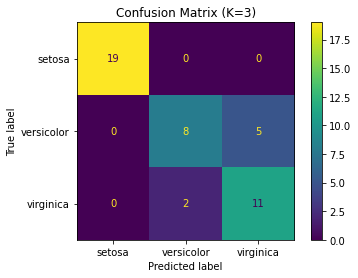


K=5
Accuracy: 0.8


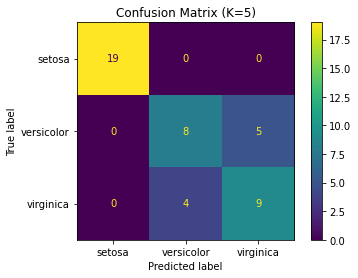


K=7
Accuracy: 0.8


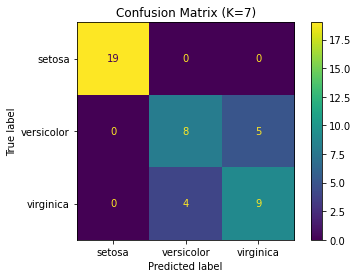


K=9
Accuracy: 0.8222222222222222


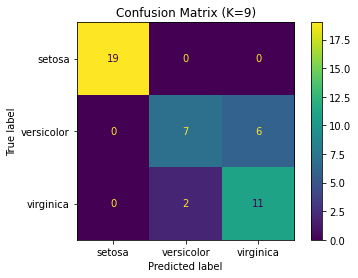

In [6]:
# Try different values of K
k_values = [1, 3, 5, 7, 9]
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\nK={k}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot()
    plt.title(f"Confusion Matrix (K={k})")
    plt.show()

In [9]:
# Visualize decision boundary (only 2 features used)
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
    plt.title(title)
    plt.xlabel("Feature 1 (sepal length)")
    plt.ylabel("Feature 2 (sepal width)")
    plt.show()

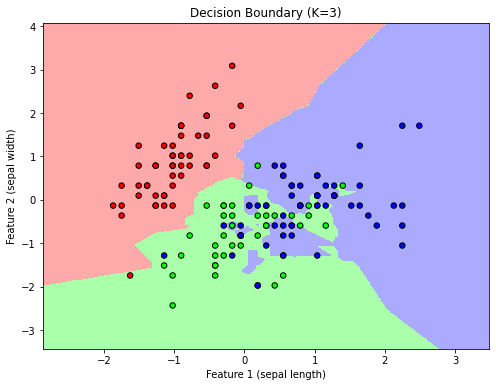

In [10]:
# Train and visualize for best K (say K=3)
best_k = 3
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
plot_decision_boundary(model, X_scaled, y, f"Decision Boundary (K={best_k})")